### Example to show how to simulate detections from point reference with given uncertainty.

In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, kstest, norm

from radardetseval.utilities.ecdf import ecdf
from radardetseval.simulators.sim_det_from_point import sim_det_from_scs_cart_point
from radardetseval.stats.nees import nees_test
from radardetseval.visualization.plot_detection import plot_detection_scs
from radardetseval.visualization.plot_point import plot_point
from radardetseval.visualization.utilities import publish_reduced_labels

### Load data

In [18]:
data_path = r'private\sim_single_point_x4_00_y4_00_vx4_00_vy_00_no_ref_cov.pickle'
with open(data_path, 'rb') as handle:
    sim_out = pickle.load(handle)

### Single det case

Text(0.5, 1.0, 'Simulation of reference and measurement data from ground truth')

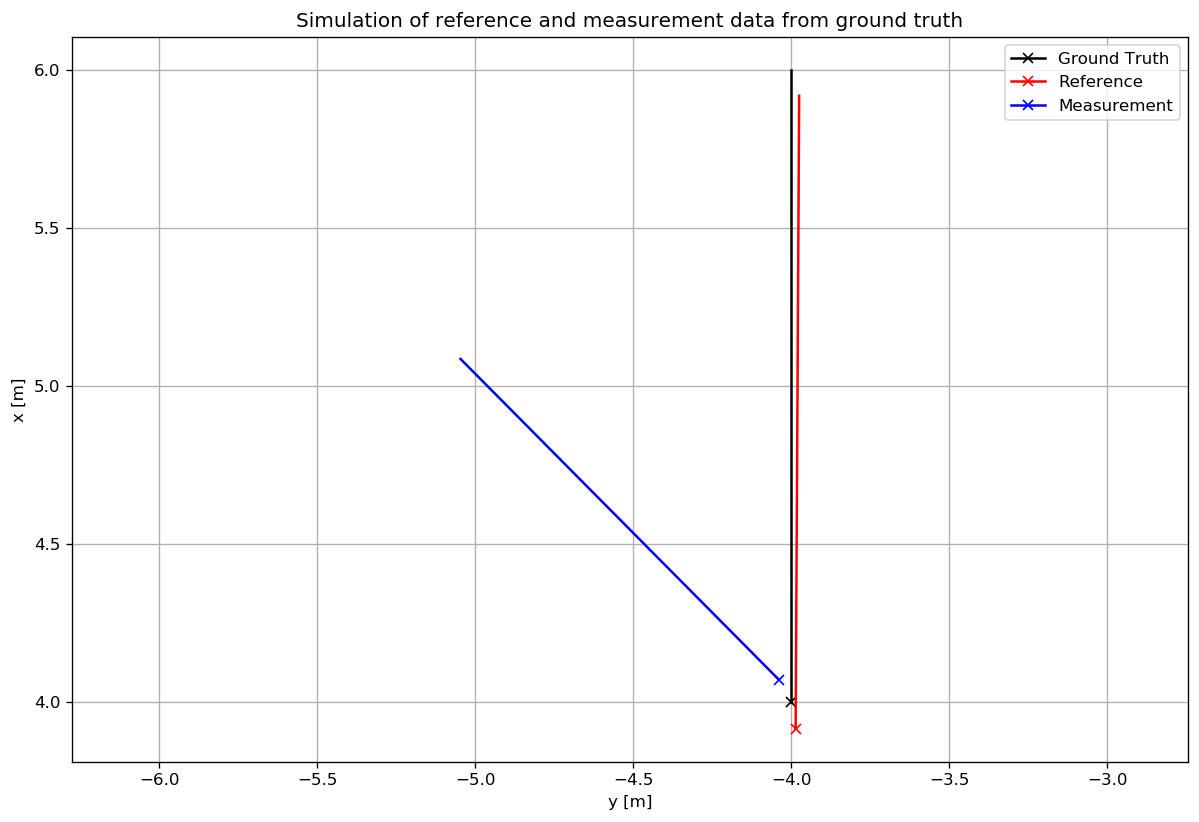

In [19]:
fig1=plt.figure(figsize=(12, 8), dpi= 120, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
v_scale = 0.5
plot_point(ax, sim_out.gt_x, sim_out.gt_y, sim_out.gt_vx, sim_out.gt_vy, v_scale=v_scale, 
           color='k', label='Ground Truth')
plot_point(ax, sim_out.signals.sim_ref_x[0], sim_out.signals.sim_ref_y[0], 
           sim_out.signals.sim_ref_vx[0], sim_out.signals.sim_ref_vy[0], 
           v_scale=v_scale, color='r', label='Reference')
plot_detection_scs(ax, sim_out.signals.sim_meas_range[0], sim_out.signals.sim_meas_range_rate[0], sim_out.signals.sim_meas_azimuth[0], 
                   rr_scale=v_scale, color='b', label='Measurement')
publish_reduced_labels(ax)
ax.set_xlabel('y [m]')
ax.set_ylabel('x [m]')
ax.axis('equal')

ax.grid()
ax.set_title('Simulation of reference and measurement data from ground truth')

Note that Ground truth and reference velocity is shown as full 2d velocity vecctor and for measurement detection only range rate is visualized

## Distributions of results when measured and refernce covaraince was taken into account

Configuration

In [20]:
x_ref = np.linspace(0,20,1000)
y_ref = chi2.pdf(x_ref, 3) # 3 variables so 3 degree of freedom
N_bins = 100

Text(0.5, 1.0, 'Difference bitween empirical and reference distribuant')

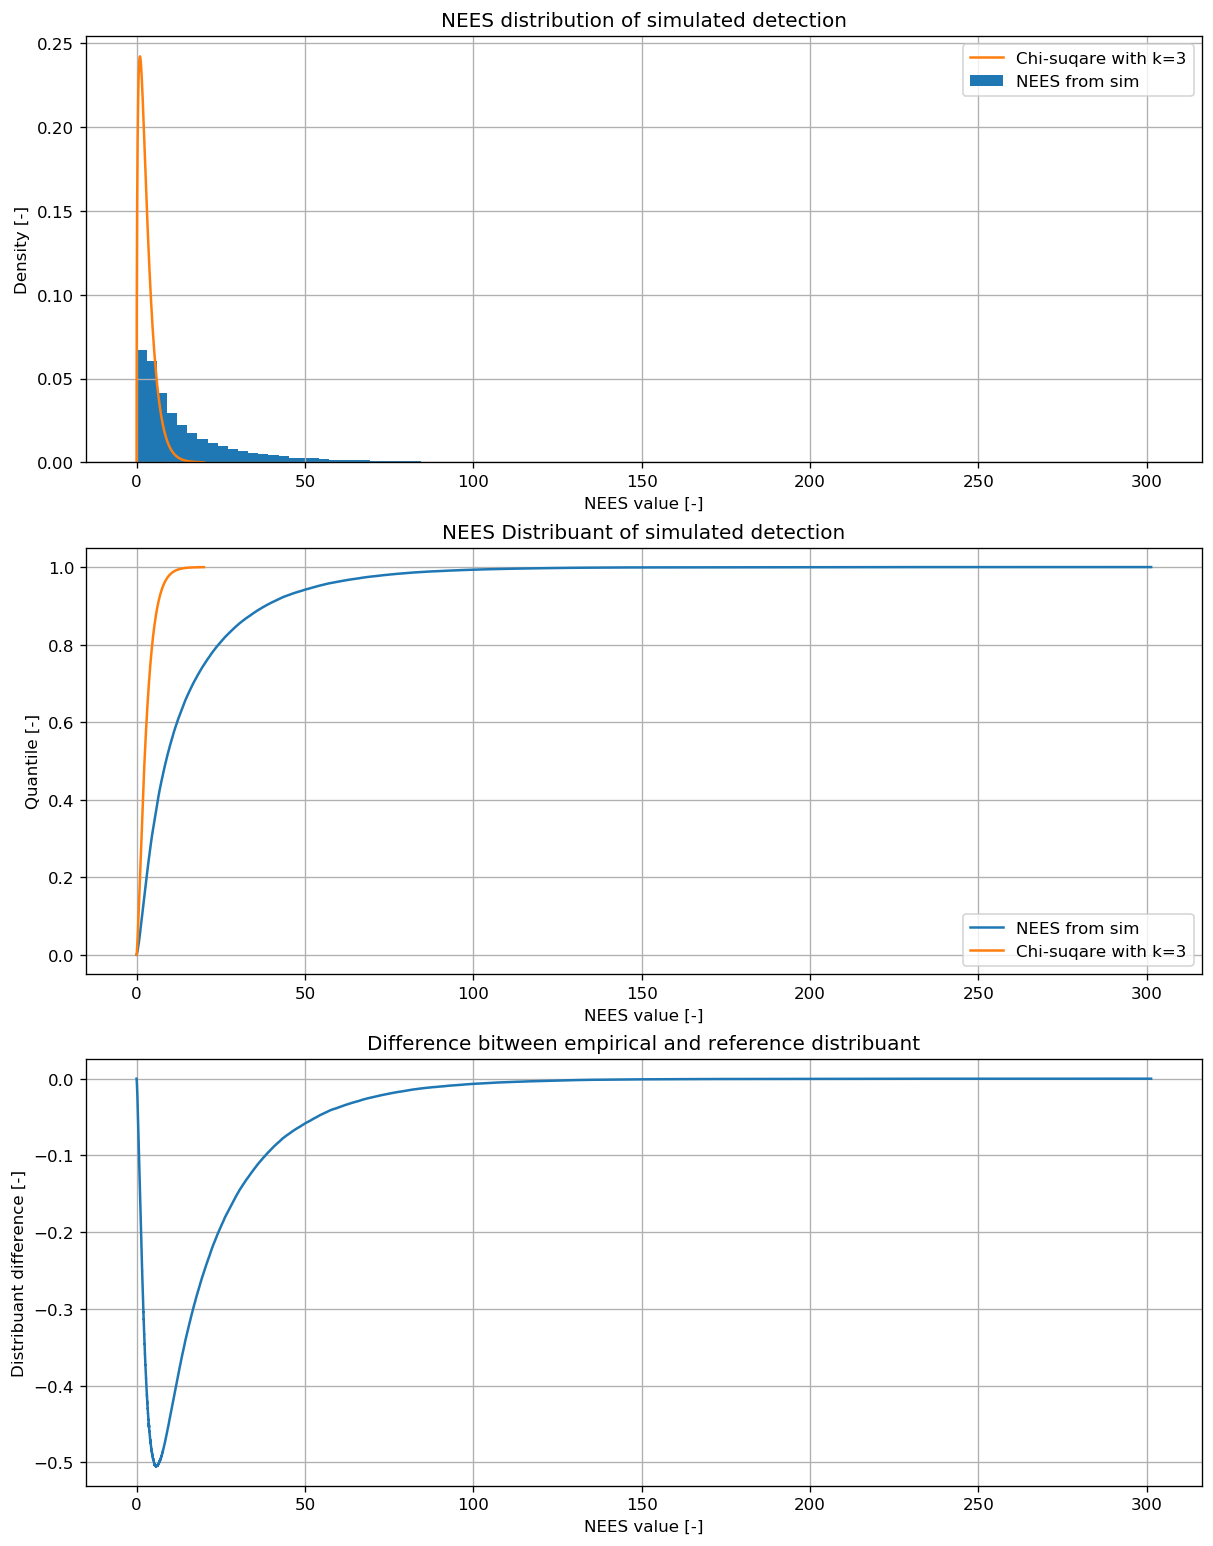

In [21]:
fig1=plt.figure(figsize=(12, 16), dpi= 120, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
sim_out.signals['nees_values'].hist(bins=100, density=True, label='NEES from sim')
plt.plot(x_ref, y_ref, label='Chi-suqare with k=3')
plt.xlabel('NEES value [-]')
plt.ylabel('Density [-]')
plt.title('NEES distribution of simulated detection')
plt.legend()

ax = plt.subplot(3, 1, 2)
x_ecdf, y_ecdf = ecdf(sim_out.signals['nees_values'])
y_ref_cdf = chi2.cdf(x_ref, 3)
plt.plot(x_ecdf, y_ecdf, label='NEES from sim')
plt.plot(x_ref, y_ref_cdf, label='Chi-suqare with k=3')
plt.xlabel('NEES value [-]')
plt.ylabel('Quantile [-]')
plt.title('NEES Distribuant of simulated detection')
plt.grid()
plt.legend()

ax = plt.subplot(3, 1, 3)
y_ref_ecdf = chi2.cdf(x_ecdf, 3)
ecdf_diff = y_ecdf - y_ref_ecdf
plt.plot(x_ecdf, ecdf_diff)
plt.xlabel('NEES value [-]')
plt.ylabel('Distribuant difference [-]')
plt.grid()
plt.title('Difference bitween empirical and reference distribuant')

## Statistical tests

Kolmogorov–Smirnov goodnes of fit test

In [22]:
max_d, p_value_ks = kstest(sim_out.signals['nees_values'], 'chi2', tuple([3]))
print(f'Maximum distance between empirical and reference distribution is {max_d:.3f}')
print(f'Kolmogorov–Smirnov test p_value is {p_value_ks:.3f}')

Maximum distance between empirical and reference distribution is 0.505
Kolmogorov–Smirnov test p_value is 0.000


NEES test

In [23]:
nees_mean = sim_out.signals['nees_values'].mean()
nees_test_variable, p_value_nees_test = nees_test(sim_out.signals['nees_values'], 3)
print(f'NEES mean is {nees_mean:.3f}')
print(f'NEES test Z varaible is {nees_test_variable:.3f}')
print(f'NEES test p_value is {p_value_nees_test:.3f}')


NEES mean is 15.582
NEES test Z varaible is 15.582
NEES test p_value is 0.000
